In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [3]:
proxy_file_path = 'usages/proxy-2024-08-07_09-16-04.json'
ngrok_file_path = 'usages/ngrok-2024-08-07_09-17-25.json'

with open(proxy_file_path, 'r') as file:
    proxy_data = json.load(file)

with open(ngrok_file_path, 'r') as file:
    ngrok_data = json.load(file)

proxy_df = pd.DataFrame(proxy_data)
ngrok_df = pd.DataFrame(ngrok_data)


## Relative Timestamps

In [5]:
proxy_start_time = proxy_df['timestamp'].iloc[0]
ngrok_start_time = ngrok_df['timestamp'].iloc[0]

proxy_df['relative_time'] = (proxy_df['timestamp'] - proxy_start_time) / 1000  # Convert to seconds
ngrok_df['relative_time'] = (ngrok_df['timestamp'] - ngrok_start_time) / 1000  # Convert to seconds


In [10]:
proxy_df['memory'] = proxy_df['memory'] / 1024 / 1024  # Convert to MB
ngrok_df['memory'] = ngrok_df['memory'] / 1024 / 1024  # Convert to MB

In [11]:
display(proxy_df.head())
display(ngrok_df.head())


,cpu,memory,ctime,elapsed,timestamp,pid,ppid,relative_time
0,0,171.570312,560,1170,1723047354478,1507976,1507835,0.000
1,0,171.570312,560,1210,1723047354518,1507976,1507835,0.040
2,20,172.546875,570,1260,1723047354567,1507976,1507835,0.089
3,20,172.546875,580,1310,1723047354617,1507976,1507835,0.139
4,0,172.546875,580,1360,1723047354667,1507976,1507835,0.189


,cpu,memory,ctime,elapsed,timestamp,pid,ppid,relative_time
0,0,165.136719,530,1040,1723047435847,1523135,1523115,0.000
1,50,165.136719,550,1080,1723047435888,1523135,1523115,0.041
2,0,165.136719,550,1130,1723047435938,1523135,1523115,0.091
3,0,165.136719,550,1180,1723047435989,1523135,1523115,0.142
4,20,165.136719,560,1230,1723047436039,1523135,1523115,0.192


In [12]:
window_size = 10
smoothed_proxy_cpu = proxy_df['cpu'].rolling(window=window_size).mean()
smoothed_ngrok_cpu = ngrok_df['cpu'].rolling(window=window_size).mean()
smoothed_proxy_memory = proxy_df['memory'].rolling(window=window_size).mean()
smoothed_ngrok_memory = ngrok_df['memory'].rolling(window=window_size).mean()


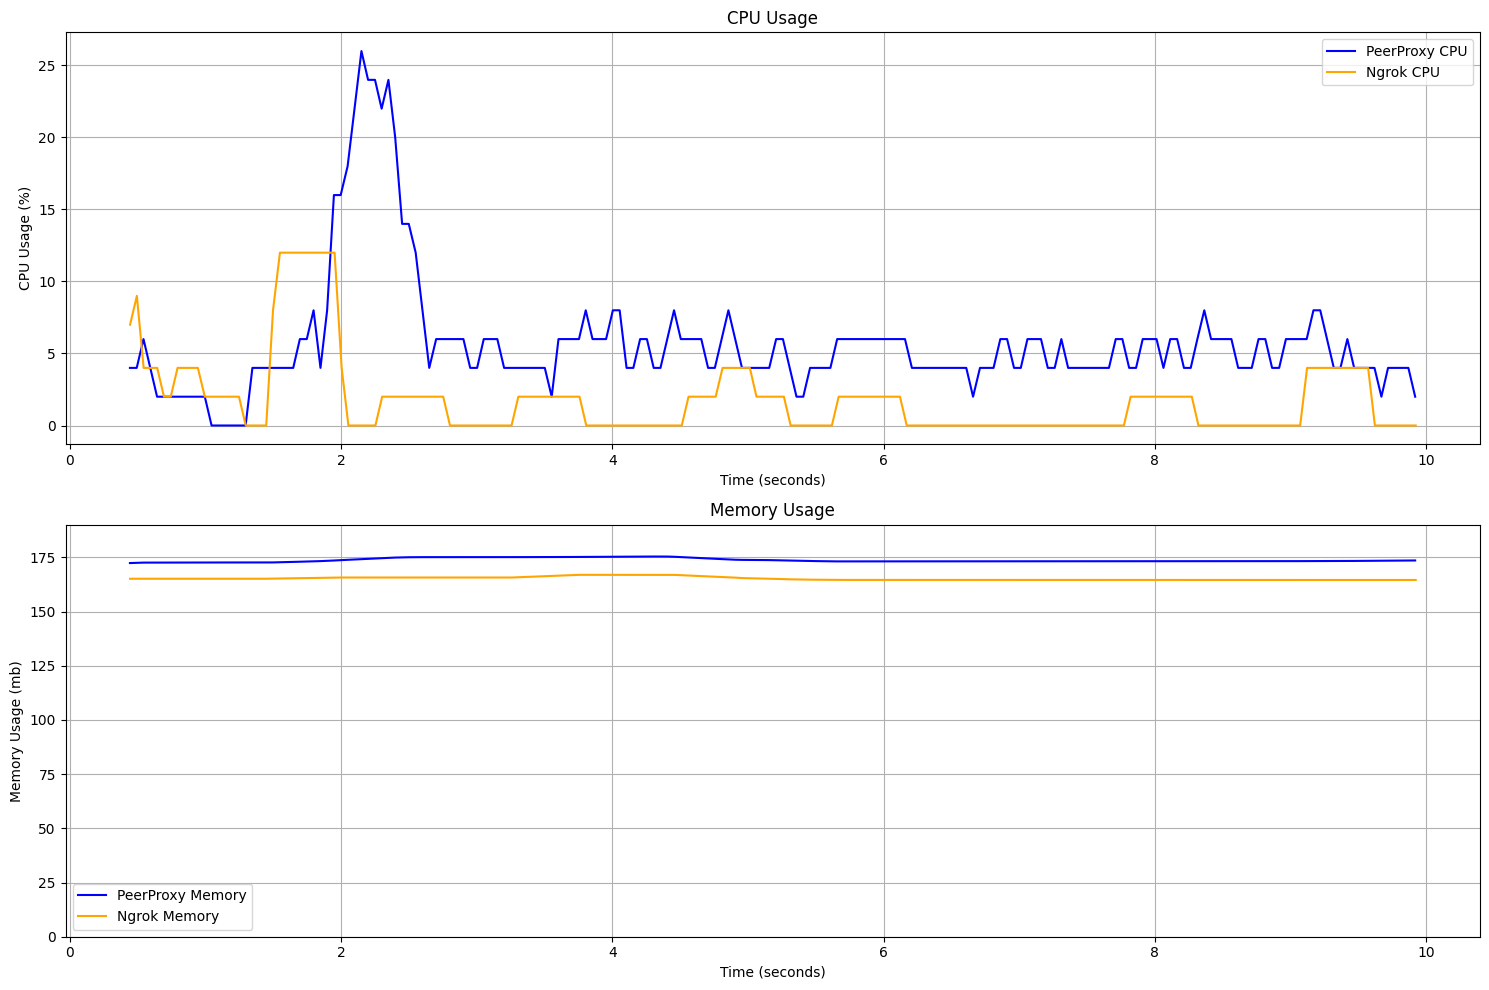

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
axs[0].plot(proxy_df['relative_time'], smoothed_proxy_cpu, label='PeerProxy CPU', color='blue')
axs[0].plot(ngrok_df['relative_time'], smoothed_ngrok_cpu, label='Ngrok CPU', color='orange')
axs[0].set_xlabel('Time (seconds)')
axs[0].set_ylabel('CPU Usage (%)')
axs[0].set_title('CPU Usage')
axs[0].grid(True)
axs[0].legend()

# Memory usage
axs[1].plot(proxy_df['relative_time'], smoothed_proxy_memory, label='PeerProxy Memory', color='blue')
axs[1].plot(ngrok_df['relative_time'], smoothed_ngrok_memory, label='Ngrok Memory', color='orange')
axs[1].set_xlabel('Time (seconds)')
axs[1].set_ylabel('Memory Usage (mb)')
axs[1].set_title('Memory Usage')
axs[1].set_ylim(0, 190)
axs[1].grid(True)
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

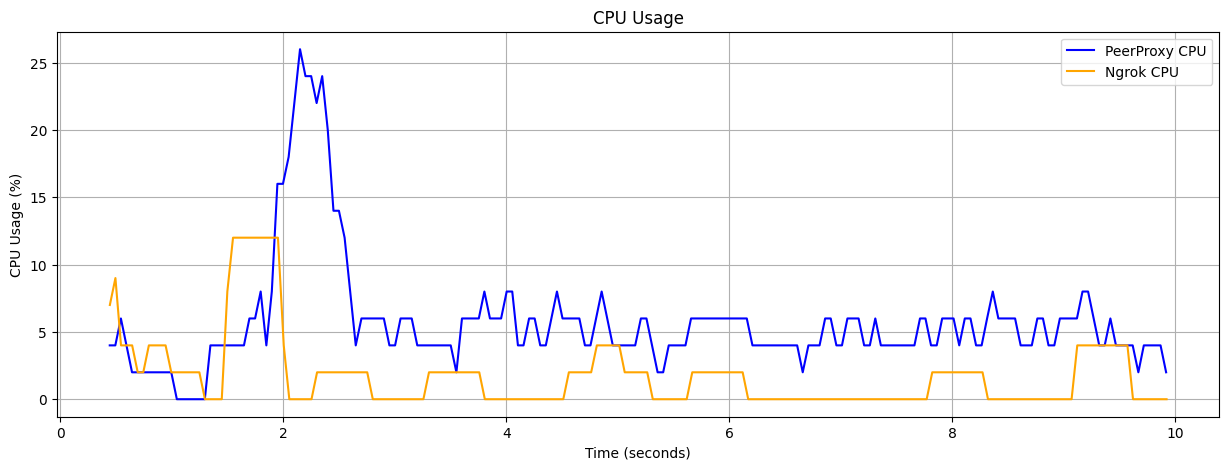

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))
axs.plot(proxy_df['relative_time'], smoothed_proxy_cpu, label='PeerProxy CPU', color='blue')
axs.plot(ngrok_df['relative_time'], smoothed_ngrok_cpu, label='Ngrok CPU', color='orange')
axs.set_xlabel('Time (seconds)')
axs.set_ylabel('CPU Usage (%)')
axs.set_title('CPU Usage')
axs.grid(True)
axs.legend()

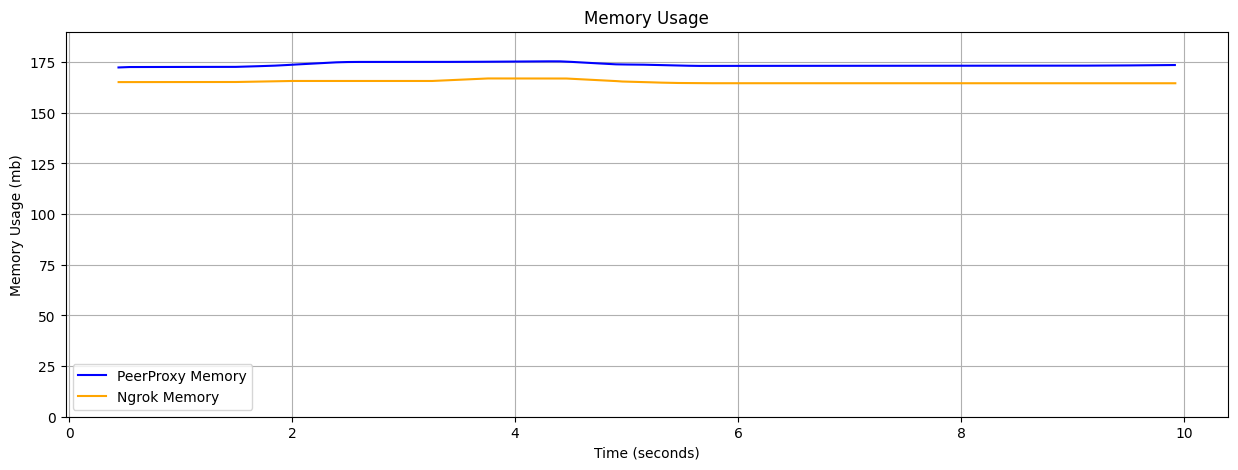

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(15, 5))

axs.plot(proxy_df['relative_time'], smoothed_proxy_memory, label='PeerProxy Memory', color='blue')
axs.plot(ngrok_df['relative_time'], smoothed_ngrok_memory, label='Ngrok Memory', color='orange')
axs.set_xlabel('Time (seconds)')
axs.set_ylabel('Memory Usage (mb)')
axs.set_title('Memory Usage')
axs.set_ylim(0, 190)
axs.grid(True)
axs.legend()

plt.show()

In [33]:
# average cpu usage
print(proxy_df["cpu"].mean())

ngrok_df["cpu"].mean()

5.628140703517588


1.9597989949748744

In [34]:
print(proxy_df["memory"].mean())
print(ngrok_df["memory"].mean())

173.66659469221105
165.19835505653268


In [36]:
print(ngrok_df["memory"].max())
print(ngrok_df["memory"].min())

166.9375
164.52734375


In [37]:
print(proxy_df["memory"].max())
print(proxy_df["memory"].min())

175.640625
171.5703125
